## PCA
**PCA** (Principal Component Analysis) is one of the most important unsupervised learning technique. It finds the hyperplane that preserves the maximum amount of variance in the data. Its a common technique to reduce dimensionality of the data, which loosing least possible variance of the data. **PCA** and **SVD** are very closely related. **SVD** is a factorization of a matrix $X=U \Sigma V^T$, where $U$ and $V$ are orthognal matrices. Columns of $V^T$ are principal components of matrix $X$. Let's see the following in examples below.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load IRIS dataset
from sklearn.datasets import load_iris
data = load_iris()
X = data['data']

In [3]:
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()
sd.fit(X)
X_std = sd.transform(X) 

In [4]:
from sklearn.decomposition import PCA
pca = PCA(random_state=0)
pca.fit(X_std)

PCA(random_state=0)

In [5]:
print("Components")
print(pca.components_)
print("-"*50)
print("Singular values")
print(pca.singular_values_)

Components
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]
--------------------------------------------------
Singular values
[20.92306556 11.7091661   4.69185798  1.76273239]


Text(0, 0.5, 'Cumulative fractional variance explained')

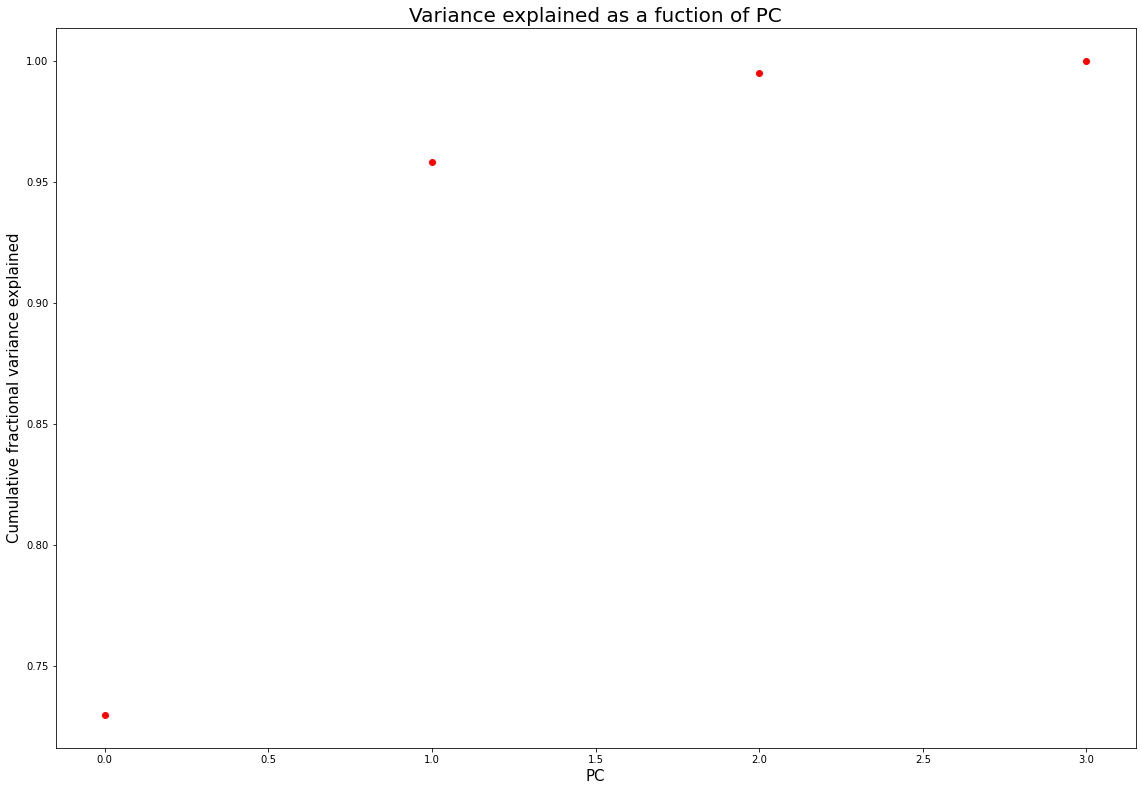

In [6]:
#Lets plot variance explained as a function of principal components
cv = pca.explained_variance_/pca.explained_variance_.sum()
cv.cumsum()
fig = plt.figure(figsize=(15,10))
ax = fig.add_axes([0,0,1,1])
ax.plot(cv.cumsum(), 'ro')
ax.set_title('Variance explained as a fuction of PC', fontSize=20)
ax.set_xlabel('PC', fontSize=15)
ax.set_ylabel('Cumulative fractional variance explained', fontSize=15)

We can see from the above plot **two PC directions** can explain most of the variance (>95%) in the data.

In [7]:
P = pca.components_[0:2,:]
X_std_pca = X_std @ P.T
X_std_pca[:10]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356]])

Now lets plot target as a function of PC1 and PC2.

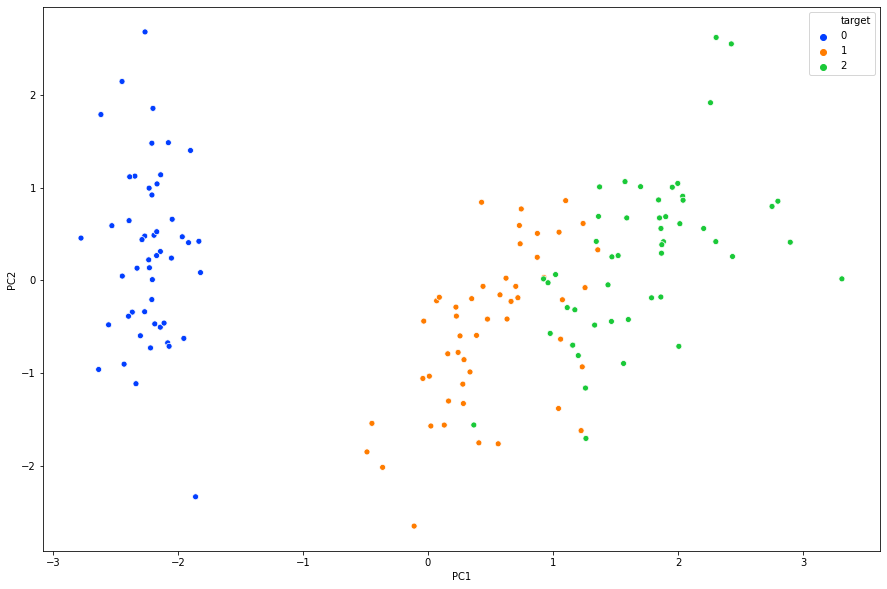

In [8]:
df = pd.DataFrame(X_std_pca, columns=['PC1', 'PC2'])
df['target'] = data['target']
plt.figure(figsize=(15,10))
sns.scatterplot(x='PC1', y='PC2', data=df, hue='target', palette='bright')

You can see from above that data is pretty well separated when we plot in PC1 and PC2 directions. Remember **PCA** doesn't look at the targets, it assumes where there is most variation in features there will also be most variation in targets. Next lets compute PCA from scratch using **SVD**.

In [9]:
(u,s,vh) = np.linalg.svd(X_std)
print("Principal components",vh)
print("-"*50)
print("Singular values", s)

Principal components [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [-0.37741762 -0.92329566 -0.02449161 -0.06694199]
 [ 0.71956635 -0.24438178 -0.14212637 -0.63427274]
 [ 0.26128628 -0.12350962 -0.80144925  0.52359713]]
--------------------------------------------------
Singular values [20.92306556 11.7091661   4.69185798  1.76273239]


These PCs match as given by **Sklearn** (they are sometimes off by a -1, that doesn't matter because its a constant scaler)

Finally lets try and get Principal components by **Eigen Value decomposition**. Getting PC by EVD is not a preferred method but is informative.

In [10]:
#Lets compute XX^T
C = X_std.T@X_std
(w, v) = np.linalg.eig(C)
print("Principal components",v)
print("-"*50)
print("Singular values", np.sqrt(w))

Principal components [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]
--------------------------------------------------
Singular values [20.92306556 11.7091661   4.69185798  1.76273239]


Principal components and signular values calculated this way also match the results from **sklearn** and **SVD**. This calculation shows that **PCA** vectors are principal components of $X^TX$.